# EDA with Python and Logistric Regression
### Dataset: Titanic
### Aim:- Predict whether the passenger survived or not

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [104]:
df = pd.read_csv('titanic_train.csv')

In [105]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

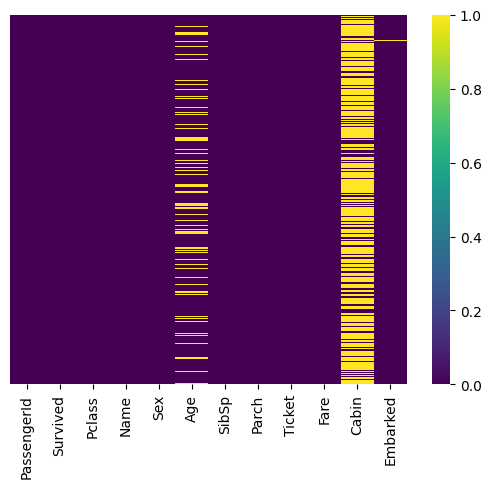

In [107]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

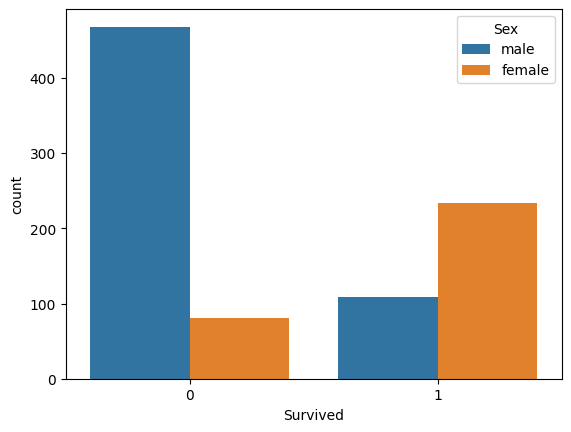

In [108]:
sns.countplot(x='Survived', data=df, hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

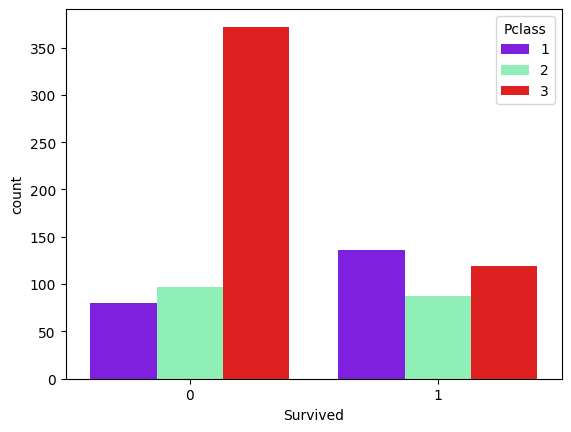

In [109]:
sns.countplot(x='Survived', data=df, hue='Pclass', palette='rainbow')

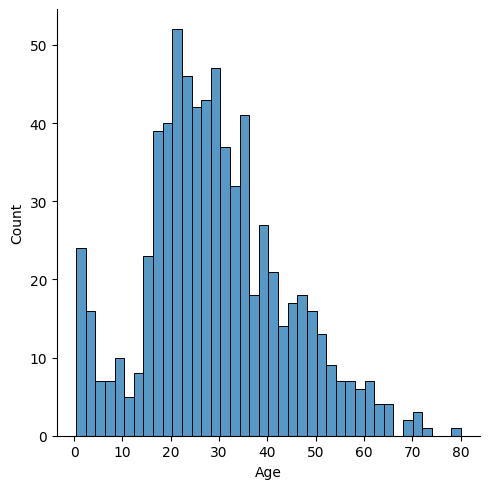

In [110]:
sns.displot(df['Age'].dropna(), kde=False, bins=40)

<Axes: xlabel='SibSp', ylabel='count'>

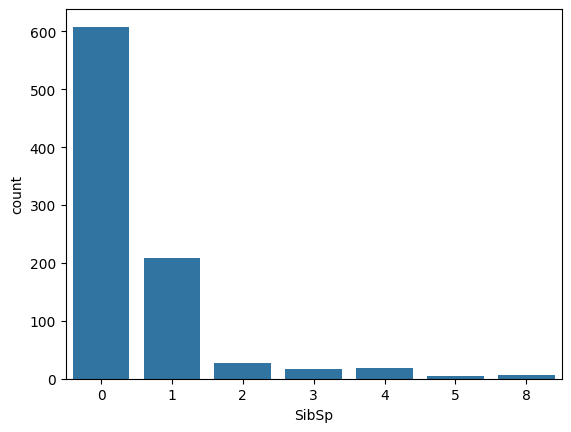

In [111]:
sns.countplot(x='SibSp', data=df)

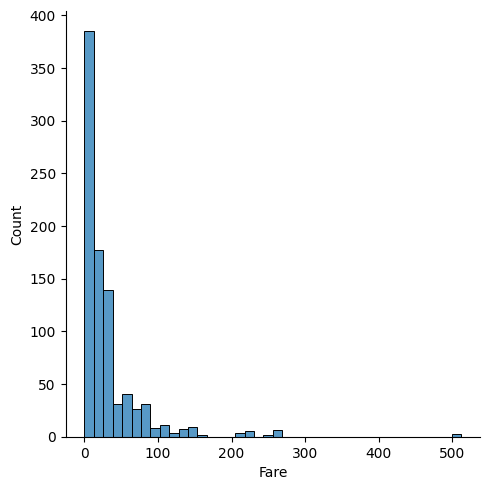

In [112]:
sns.displot(df['Fare'], bins=40)

In [113]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

## Data Cleaning

<Axes: xlabel='Pclass', ylabel='Age'>

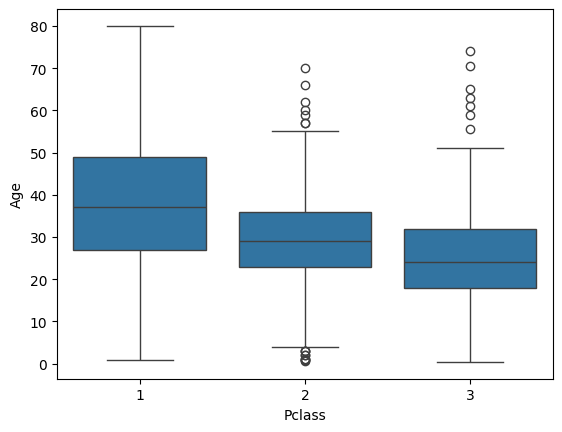

In [114]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [115]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
            # return avg(df[df['Pclass'] == 1]['Age'])
        elif Pclass == 2:
            return 29
            # return avg(df[df['Pclass'] == 2]['Age'])
        else:
            return 24
            # return avg(df[df['Pclass'] == 3]['Age'])
    else:
        return Age

In [116]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\bansa\AppData\Local\Temp\ipykernel_13468\621366941.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\bansa\AppData\Local\Temp\ipykernel_13468\621366941.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [117]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

For now dropping value because it conatins a larger number of null values

In [118]:
df.drop('Cabin', axis=1, inplace=True)

In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [120]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

We can also drop some unnecessary columns such as PassengerId, Name, Ticket etc.

In [121]:
df.dropna(inplace=True)

In [122]:
sex = pd.get_dummies(df['Sex'], drop_first=True)
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [123]:
df.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [124]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [125]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [126]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [127]:
embark.value_counts()

Q      S    
False  True     644
       False    168
True   False     77
Name: count, dtype: int64

In [128]:
df = pd.concat([df, sex, embark], axis=1)

In [129]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## Building a Logistic Regression model

Here, Survived is the dependent feature and the rest are the indepedent feature

In [130]:
df.drop('Survived', axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [131]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1), df['Survived'], test_size=0.3, random_state=101)

### Trianing and Prediction

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

c:\Users\bansa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [140]:
accuracy = confusion_matrix(y_test, predictions)
accuracy

array([[148,  15],
       [ 39,  65]])

In [143]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.797752808988764